In [4]:
# install transformers package
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 4.1 MB/s 
     |████████████████████████████████| 182 kB 71.0 MB/s 
     |████████████████████████████████| 7.6 MB 4.7 MB/s 


In [10]:
# import all the packages required
from transformers import AutoTokenizer # has pre-trained tokenizers
import re # string manipulation
import math # sqrt will be called
import matplotlib.pyplot as plt

In [12]:
# define a function that remove certain special string from original string
def preprocess_str(s):
  s = re.sub('#','', s)
  s = re.sub('▁','', s)
  s = re.sub('</w>','', s)
  return s

# Define a function that calculate the similarity of two tokenizers
def Tokenizer_Similarity(t1 = 'distilbert-base-uncased', t2 = 'distilbert-base-cased', data = None):

  # initialize autotokenizer with tokenizer name of t1 and t2
  tokenizer1 = AutoTokenizer.from_pretrained(t1)
  tokenizer2 = AutoTokenizer.from_pretrained(t2)
  # create a list called res which stores the mathcing elements in t1 and t2 tokenization results
  res = []
  # Iterate each URL in input dataset
  for i in range(data.shape[0]):
    # remove these 2 symbols to simplify our comparison process
    entry = re.sub('#', '', data[i])
    entry = re.sub('▁', '', entry)
    # Convert token id to tokens. Since different tokenizers have different token id, we can not directely compare token id with different tokenizer
    # line1 and line2 are lists that contains tokens after tokenization
    line1 = tokenizer1.convert_ids_to_tokens(tokenizer1.encode(entry))
    line2 = tokenizer2.convert_ids_to_tokens(tokenizer2.encode(entry))
    # Get the length of each token list (the lengths of these two lists are not necessary the same)
    len1 = len(line1)
    len2 = len(line2)
    # match: how many tokens are matched from two tokenization results. Initialize match = 0
    match = 0
    # current index that has been compared so far for tokenizer t1 and t2. Since nothing has been compared at beginning, initialize with -1
    str_id1 = -1;
    str_id2 = -1;
    # Current index of lists line1 and line2 that will be compared in the next iteration. Since we will compare the first element, initializ with 0
    id1 = 0;
    id2 = 0;
    
    # If the first element from list is a start tag: ['<s>', '<|startoftext|>', '[CLS]'], we skip it.
    if line1[id1] in ['<s>', '<|startoftext|>', '[CLS]']:
      id1 += 1
    if line2[id2] in ['<s>', '<|startoftext|>', '[CLS]']:
      id2 += 1
    # remove special string from each element
    line1 = [preprocess_str(i) for i in line1]
    line2 = [preprocess_str(i) for i in line2]
    # start element-wise comparison in sequential order
    while id1 < len(line1) and id2 < len(line2):
      # Case: if element matches
      # if the element at id1 of line1 equals the element at id2 of line2 and also the string index is matching, 
      # that means this matching element is from the same piece in original string
      if line1[id1] == line2[id2] and str_id1 == str_id2:
        # we found one more match element
        match += 1
        # updata the string index and list index for both tokenizer
        str_id1 += len(line1[id1])
        str_id2 += len(line2[id2])
        # move to the next element for both line1 and line2
        id1 += 1
        id2 += 1
      # Case: if element not matches
      else:
        # if str_id1 < str_id2, means the current string id for tokenizer t1 is smaller than t2,
        # in order to find matching elements, we should move str_id1 forward while keep str_id2 the same
        if str_id1 < str_id2:
          # update corresponding quantities for tokenizer t1 
          str_id1 += len(line1[id1])
          id1 += 1
          # esle update corresponding quantities for tokenizer t1 
        else:    
          str_id2 += len(line2[id2])
          id2 += 1

    # calculate the correlation
    correlation = match / math.sqrt(len1) / math.sqrt(len2)
    res.append(correlation)
  # Plot out the correlation histogram
  plt.hist(res, density=True, bins=60)
  plt.title("%s %s Similarity" %(t1, t2))
  plt.xlabel("Similarity")
  plt.show()

In [ ]:
import pandas as pd
# read the data for correlation calculation
def Preprocessing(path):
    data = pd.read_csv(path, encoding="ISO-8859–1")
    data.dropna()
    data = data.drop_duplicates(subset= ['URL'], keep = 'first')
    X = data['URL']
    y=data['Label']
    return X, y
X_test, y_test = Preprocessing('/content/drive/MyDrive/phising_site_url_data/Testing.csv') 

gpt2


Token indices sequence length is longer than the specified maximum sequence length for this model (515 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1559 > 1024). Running this sequence through the model will result in indexing errors


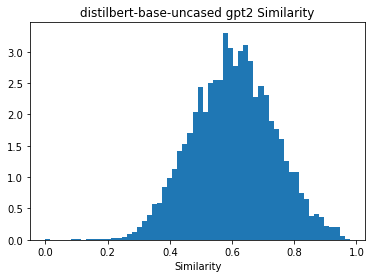

xlm-roberta-base


Downloading:   0%|          | 0.00/615 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (723 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (515 > 512). Running this sequence through the model will result in indexing errors


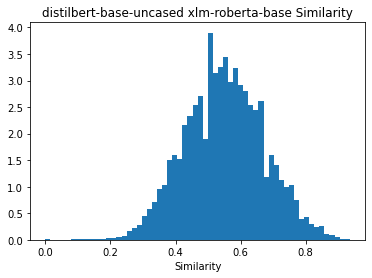

openai/clip-vit-large-patch14


Downloading:   0%|          | 0.00/905 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/961k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/389 [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (90 > 77). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (515 > 512). Running this sequence through the model will result in indexing errors


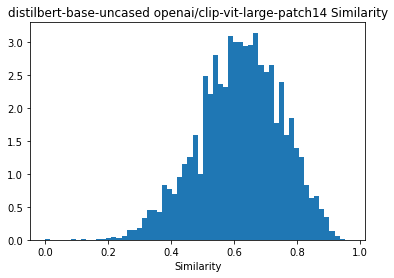

roberta-base


Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (1024 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (515 > 512). Running this sequence through the model will result in indexing errors


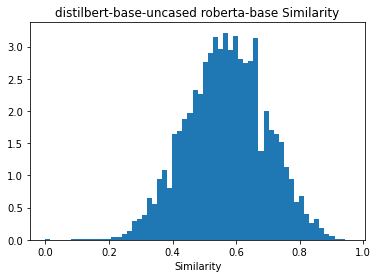

allenai/specter


Downloading:   0%|          | 0.00/321 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/222k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (515 > 512). Running this sequence through the model will result in indexing errors


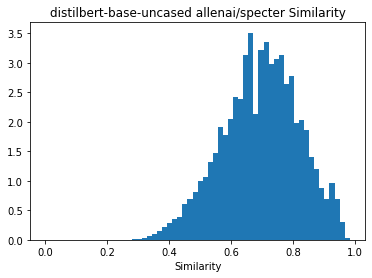

distilbert-base-cased


Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/411 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (585 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (515 > 512). Running this sequence through the model will result in indexing errors


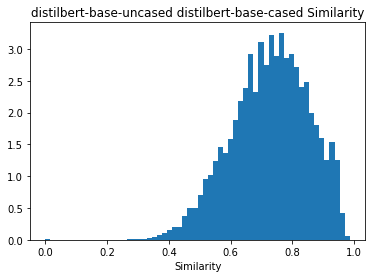

facebook/bart-base


Downloading:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (515 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1561 > 1024). Running this sequence through the model will result in indexing errors


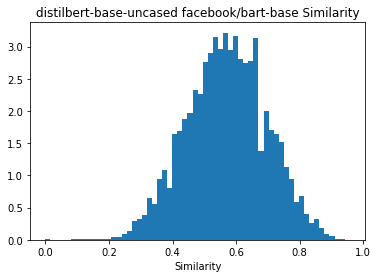

In [13]:
# we use 'distilbert-base-uncased' as base case and compare it with other tokenizers in the test_set
test_set = ['gpt2', 'xlm-roberta-base', 'openai/clip-vit-large-patch14', 'roberta-base', 'allenai/specter','distilbert-base-cased', 'facebook/bart-base']
for item in test_set:
  print(item)
  Tokenizer_Similarity('distilbert-base-uncased', item, data = X_test)